In [109]:
# 필수 과제 1번 : 지도 학습

# 주택 가격 예측 모델 구축

# 1. 데이터 탐색에 필요한 라이브러리
import pandas as pd #pandas : 데이터 처리 및 분석용 
import numpy as np #numpy : 수치 계산용
import matplotlib.pyplot as plt #matplotlib : 기본 시각화 도구
import seaborn as sns #seaborn : 고급 시각화 도구

# 데이터 로드
df = pd.read_csv('C:/Users/user/Desktop/AI_9/sparta_ai_9/챕터2 개인과제/챕터2 개인과제 자료/housingdata.csv') 
# read_csv : csv 파일을 데이터프레임으로 읽기

# 결측치 확인
print("결측치 개수:")
print(df.isnull().sum()) #isnull() : 결측치 확인 / sum() : 결측치 개수 확인

결측치 개수:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [110]:
# 결측치 개수 확인
# 결측치 개수가 0개라면 결측치(NaN)이 없는 것이고, 0이 아니라면 결측치(NaN)가 있는 것이다.

# 결측치(NaN) 처리 방법 확인을 위한 기술 통계량
print("결측치 처리 전 기술 통계량:")
print(df.describe()) #describe() : 기술 통계량 확인
# 기술 통계랑은 평균, 표준편차, 최소/최대값 등을 포함한다.

# 결측치(NaN)을 각 열의 평균값으로 대체
df_filled = df.fillna(df.mean()) #fillna() : 결측치 대체 / mean() : 평균값 계산

# 결측치(NaN) 처리 결과 확인
print("\n결측치 처리 후 확인:")
print(df_filled.isnull().sum()) #isnull() : 결측치 확인 / sum() : 결측치 개수 확인

결측치 처리 전 기술 통계량:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


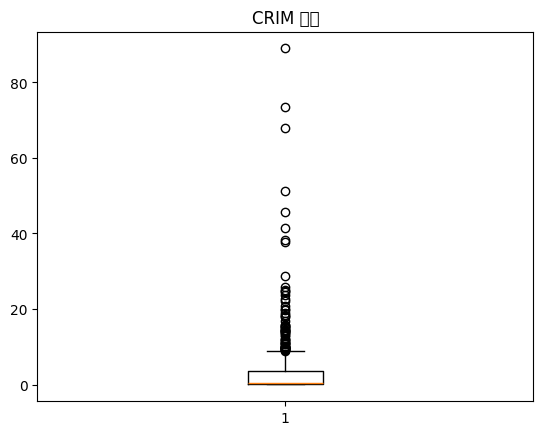

In [111]:
# 결측치(NaN) 처리 후 기술 통계량 확인

# CRIM 열의 boxplot 그리기
plt.boxplot(df_filled['CRIM']) # df_filled['CRIM'] : CRIM 열의 데이터
plt.title('CRIM 분포') # title() : 그래프 제목 설정
plt.show() # show() : 그래프 표시

# 출력 결과에 대한 설명 ▼

# CRIM : 마을별 1인당 범죄율

In [112]:
# 4번 셀에 describe()를 사용하였기에, CRIM 확인 가능
# CRIM 25% 하한값은 0.081900
# CRIM 75% 상한값은 3.560263

# CRIM 열의 Q1, Q3, IQR 계산
Q1 = df_filled['CRIM'].quantile(0.25)    # 1사분위수 25%
Q3 = df_filled['CRIM'].quantile(0.75)    # 3사분위수 75%
IQR = Q3 - Q1                            # IQR 계산 75% - 25% = 50%

# 이상치 경계값 계산
lower_bound = Q1 - 1.5 * IQR    # 25% - 1.5 * 50% = -50% (하한값)
upper_bound = Q3 + 1.5 * IQR    # 75% + 1.5 * 50% = 150% (상한값)

print('CRIM 열의 이상치 경계값:')
print(f'하한값: {lower_bound:.2f}') # .2 : 소수점 둘째자리까지 표시
print(f'상한값: {upper_bound:.2f}') # f : 실수(float) 형식으로 표시

# 출력 결과에 대한 설명 ▼

# IQR = 3.560263 - 0.081900 = 3.478363
# 하한값 = 0.081900 - 1.5 * 3.478363 = -5.21 (하한값)
# 상한값 = 3.560263 + 1.5 * 3.478363 = 8.90 (상한값)

# 이 경계값(-5.21 ~ 8.90)을 벗어나는 값들이 이상치

CRIM 열의 이상치 경계값:
하한값: -5.21
상한값: 8.90


In [113]:
# CRIM 열의 이상치 찾기
outliers = df_filled[(df_filled['CRIM'] < -5.21) | (df_filled['CRIM'] > 8.90)]  
#  |(판다스의 'or'연산자) : 두 조건 중 하나라도 참이면 참을 반환
# 두 조건을 모두 만족하는 값들을 찾기 위해 |연산자와 리스트 형식으로 출력

print("이상치 개수:", len(outliers))
print("\n이상치 값들:")
print(df_filled[df_filled['CRIM'] > 8.90].sort_values(by='CRIM'))
# sort_values : 데이터프레임의 특정 컬럼을 기준으로 정렬하는 메서드
# by= : 정렬할 기준 열을 지정하는 매개변수, CRIM 열을 기준으로 정렬

# 출력 결과에 대한 설명

# 아래 결과 값을 보면 가로가 짤려서 밑으로 내려 간 것이고
# 처음 5행, 마지막 5행을 보여주는 게 pandas의 기본 설정 (중간에 ...은 생략된 것)

이상치 개수: 64

이상치 값들:
         CRIM   ZN  INDUS  CHAS    NOX     RM         AGE     DIS  RAD  TAX  \
356   8.98296  0.0   18.1   1.0  0.770  6.212   97.400000  2.1222   24  666   
382   9.18702  0.0   18.1   0.0  0.700  5.536  100.000000  1.5804   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.000000  1.1691   24  666   
448   9.32909  0.0   18.1   0.0  0.713  6.185   98.700000  2.2616   24  666   
429   9.33889  0.0   18.1   0.0  0.679  6.380   68.518519  1.9682   24  666   
..        ...  ...    ...   ...    ...    ...         ...     ...  ...  ...   
414  45.74610  0.0   18.1   0.0  0.693  4.519  100.000000  1.6582   24  666   
410  51.13580  0.0   18.1   0.0  0.597  5.757  100.000000  1.4130   24  666   
405  67.92080  0.0   18.1   0.0  0.693  5.683  100.000000  1.4254   24  666   
418  73.53410  0.0   18.1   0.0  0.679  5.957  100.000000  1.8026   24  666   
380  88.97620  0.0   18.1   0.0  0.671  6.968   91.900000  1.4165   24  666   

     PTRATIO       B  LSTAT  ME

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


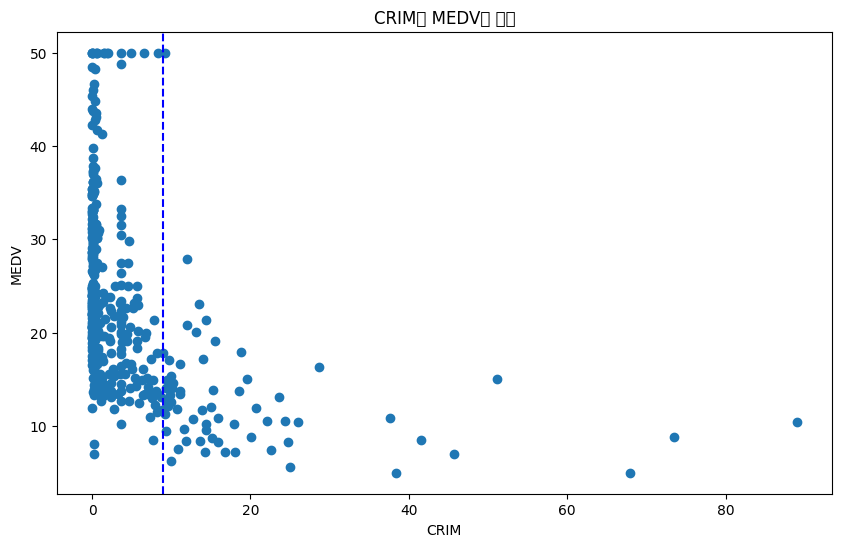

In [114]:
# 이상치 처리 전 데이터 확인

# CRIM과 MEDV의 산점도 그리기
plt.figure(figsize=(10, 6))                        # figure() : 그래프를 그리기 위한 캔버스 크기 설정
plt.scatter(df_filled['CRIM'], df_filled['MEDV'])  # scatter() : 산점도(점으로 된 그래프) 그리기
plt.axvline(x=8.90, color='blue', linestyle='--')  # axvline() : 이상치 경계선(수직선) 그리기
plt.xlabel('CRIM')                                 # xlabel() : x축 레이블의 이름은 CRIM
plt.ylabel('MEDV')                                 # ylabel() : y축 레이블의 이름은 MEDV
plt.title('CRIM과 MEDV의 관계')                     # title() : 그래프 제목
plt.show()                                         # show() : 그래프 표시


In [115]:
# 이상치 처리

# 이상치를 경계값으로 대체 / 이상치를 제거하는 선택지도 있지만 데이터 손실이 크기에 경계값으로 대체
df_capped = df_filled.copy() # copy() : 데이터프레임 복사
df_capped.loc[df_capped['CRIM'] > 8.90, 'CRIM'] = 8.90 # loc[] : 특정 행과 열을 선택하는 메서드
# CRIM 열의 값이 8.90보다 큰 경우, CRIM 열의 값을 8.90으로 대체

# 이상치를 경계값으로 대체(Capping)한 결과 확인
print("처리 전 CRIM 최대값:", df_filled['CRIM'].max())
print("처리 후 CRIM 최대값:", df_capped['CRIM'].max())


처리 전 CRIM 최대값: 88.9762
처리 후 CRIM 최대값: 8.9


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{

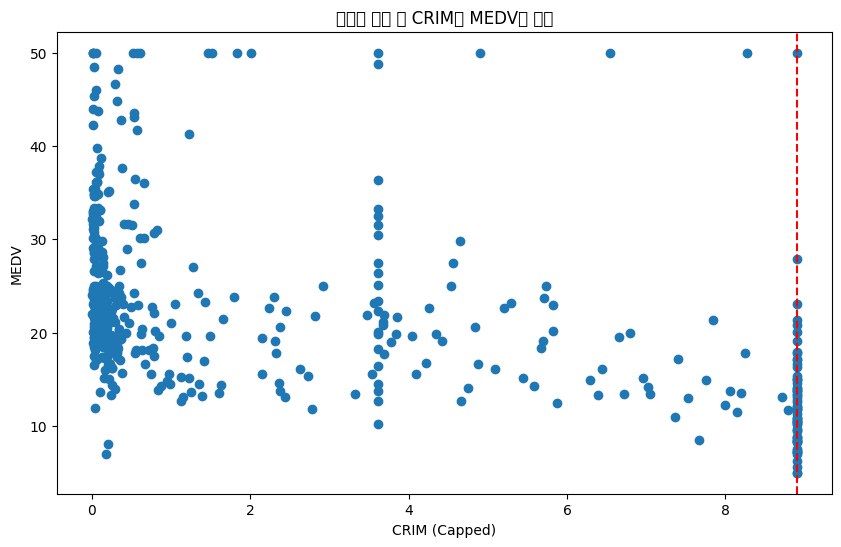

In [116]:
# 시각화로 확인
plt.figure(figsize=(10, 6))                       # figure() : 그래프를 그리기 위한 캔버스 크기 설정
plt.scatter(df_capped['CRIM'], df_capped['MEDV']) # scatter() : 산점도(점으로 된 그래프) 그리기 
plt.axvline(x=8.90, color='red', linestyle='--')    # axvline() : 이상치 경계선(수직선) 그리기
plt.xlabel('CRIM (Capped)')                       # xlabel() : x축 레이블의 이름은 CRIM (Capped)  
plt.ylabel('MEDV')                                # ylabel() : y축 레이블의 이름은 MEDV
plt.title('이상치 처리 후 CRIM과 MEDV의 관계')      # title() : 그래프 제목
plt.show()                                        # show() : 그래프 표시

In [117]:
# 상관관계 계산
correlations = df_capped.corr()['MEDV'].sort_values(ascending=False)
# corr() : 상관관계 계산 │ sort_values() : 순서대로 정렬 │ ascending=False : 내림차순 정렬

print("각 특성과 MEDV의 상관관계:")
print(correlations)

각 특성과 MEDV의 상관관계:
MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
CRIM      -0.438541
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


In [118]:
# 출력 결과에 대한 설명 ▼

# #MEDV        1.000000   # 자기 자신과의 상관관계
# RM          0.695360    # 방 개수가 많을수록 가격 상승 (양의 상관관계 중 가장 큰 값)
# ZN          0.360445
# B           0.333461
# DIS         0.249929
# CHAS        0.175260
# AGE        -0.376955    # 오래된 주택일수록 가격이 하락세
# NOX        -0.427321
# TAX        -0.468536
# INDUS      -0.483725
# CRIM       -0.488993    # 범죄율이 높을수록 가격 하락
# PTRATIO    -0.507787    
# LSTAT      -0.737663    # 하위 계층이 많을수록 가격 크게 하락(음의 상관관계 중 가장 큰 값)

In [119]:
# 특성 선택

from sklearn.feature_selection import SelectKBest, f_regression # Select K Best : 상위 k개의 특성 선택
# sklearn : 머신러닝 라이브러리                                   # f_regression : 회귀 분석 점수 계산
# feature_selection : 특성 선택 라이브러리

# 특성(X)과 타겟(y) 분리 
X = df_capped.drop('MEDV', axis=1)  # drop() : 특정 열을 제거하는 메서드
y = df_capped['MEDV']               # MEDV를 타겟으로, axis=1 : 열 기준으로 제거

# 상위 5개 특성 선택
selector = SelectKBest(score_func=f_regression, k=5)  # score_func=f_regression : 회귀 분석 점수 계산, 상위 5개
X_selected = selector.fit_transform(X, y)            # fit_transform() : 특성 선택 및 변환

# 선택된 특성들의 점수 확인
feature_scores = pd.DataFrame({
    'Feature': X.columns,           # X값의 열 이름을 '특성'으로 설정
    'Score': selector.scores_       # selector의 scores_값을 '중요도 점수'로 설정
})

# 데이터프레임의 열 인덱스 확인
for i, column in enumerate(X.columns): # enumerate() : 인덱스와 값을 동시에 반환(i, column)
    print((f"{i}: {column}"))

print("\n")      # 결과 값과 혼동되지 않게 줄 바꿈

print("상위 5개 특성의 중요도 점수 :") 
print(feature_scores.sort_values('Score', ascending=False).head())
# sort_values() : 특성 중요도 점수를 내림차순(ascending=False)으로 정렬
# head() : 상위 5개 행을 선택

0: CRIM
1: ZN
2: INDUS
3: CHAS
4: NOX
5: RM
6: AGE
7: DIS
8: RAD
9: TAX
10: PTRATIO
11: B
12: LSTAT


상위 5개 특성의 중요도 점수 :
    Feature       Score
12    LSTAT  548.735758
5        RM  471.846740
10  PTRATIO  175.105543
2     INDUS  149.792187
9       TAX  141.761357


In [120]:
# 선택된 특성들의 스케일 확인
print("각 특성의 범위:")
for feature in ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']: # feature : 특성 이름 │ 상위 5개 특성
    print(f"{feature}:")                                  # 특성 이름 출력
    print(f"  최소값: {df_capped[feature].min():.2f}")    # 최소값 출력 
    print(f"  최대값: {df_capped[feature].max():.2f}")    # 최대값 출력
                    # df_capped 는 19번 셀에서 만든 데이터프레임

# 최소값과 최대값을 확인후, 스케일을 조정할 수 있다.

각 특성의 범위:
LSTAT:
  최소값: 1.73
  최대값: 37.97
RM:
  최소값: 3.56
  최대값: 8.78
PTRATIO:
  최소값: 12.60
  최대값: 22.00
INDUS:
  최소값: 0.46
  최대값: 27.74
TAX:
  최소값: 187.00
  최대값: 711.00


In [121]:
# 데이터 표준화 스케일링

from sklearn.preprocessing import StandardScaler # StandardScaler : 표준화 스케일링
# sklearn(머신러닝 라이브러리)에서 preprocessing(데이터 전처리)모듈의 StandardScaler 클래스를 사용

# 선택된 특성들만 사용
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX'] 
X = df_capped[selected_features] # df_capped 데이터프레임에서 selected_features 열을 선택
y = df_capped['MEDV']            # df_capped 데이터프레임에서 MEDV 열을 선택
  # df_capped 는 19번 셀에서 만든 데이터프레임

# 스케일링
scaler = StandardScaler() # StandardScaler 모두 비슷한 범위로 변환(데이터 표준화 도구)
X_scaled = scaler.fit_transform(X)  # 1. fit: 각 특성의 평균과 표준편차 계산
                                    # 2. transform: (값 - 평균) / 표준편차로 변환

# 스케일링 결과를 DataFrame으로 변환 (보기 좋게)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features) 
# columns=selected_features : 열 이름을 selected_features로 설정

print("스케일링 후 데이터:") 
print(X_scaled_df.describe()) # describe() : 기술 통계량 확인

# 출력 결과에 대한 설명 ▼

# 평균(0)을 기준으로 얼마나 떨어져 있는지 확인
# pandas라이브러리는 과학적 표기법을 사용하여 출력된다 ex) 1.000000e+00

스케일링 후 데이터:
              LSTAT            RM       PTRATIO         INDUS         TAX
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  506.000000
mean  -1.404235e-16 -1.088282e-16 -4.212704e-16 -5.616939e-17    0.000000
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00    1.000990
min   -1.568047e+00 -3.880249e+00 -2.707379e+00 -1.587438e+00   -1.313990
25%   -7.829837e-01 -5.686303e-01 -4.880391e-01 -8.806806e-01   -0.767576
50%   -1.028336e-01 -1.084655e-01  2.748590e-01 -1.769121e-01   -0.464673
75%    5.501962e-01  4.827678e-01  8.065758e-01  1.048332e+00    1.530926
max    3.604806e+00  3.555044e+00  1.638828e+00  2.488742e+00    1.798194


In [122]:
# 데이터 분할

from sklearn.model_selection import train_test_split
# sklearn(머신러닝 라이브러리)에서 
# model_selection(모델 선택 라이브러리)모듈의 
# train_test_split 클래스를 사용

# train_test_split() : 데이터를 학습용(80%)과 테스트용(20%)으로 분리하는 함수
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,          # X_scaled : 스케일링된 특성 데이터 
    y,                 # y : 타겟(집값) 데이터
    test_size=0.2,     # test_size : 테스트 데이터 비율 20%    
    random_state=42    # random_state : 재현 가능하도록 랜덤 시드 고정, 42는 무작위 숫자
)                      # 숫자를 입력하지 않으면 매번 다른 랜덤 시드가 생성된다.

# 분할된 데이터 크기 확인
print("학습 데이터 크기:", X_train.shape)    # X_train : 학습용 데이터 크기 (= 80%)
print("테스트 데이터 크기:", X_test.shape)    # X_test : 테스트용 데이터 크기 (= 20%)

# 출력 결과에 대한 설명 ▼

# 전체 데이터(506개)를 8:2로 나눴기 때문에:
# 학습 데이터: 506 × 0.8 = 404개
# 테스트 데이터: 506 × 0.2 = 102개

#학습 데이터 (404, 5)
# 404개의 행 (데이터 샘플)
# 5개의 열 (선택한 특성들: LSTAT, RM, PTRATIO, INDUS, TAX)

# 테스트 데이터 (102, 5)
# 102개의 행 (데이터 샘플)
# 5개의 열 (선택한 특성들: LSTAT, RM, PTRATIO, INDUS, TAX)

학습 데이터 크기: (404, 5)
테스트 데이터 크기: (102, 5)


In [123]:
# 여러 회귀 모델 만들기

# 필요한 모델들 임포트
from sklearn.linear_model import LinearRegression          # 선형 회귀
from sklearn.tree import DecisionTreeRegressor            # 의사결정나무
from sklearn.ensemble import RandomForestRegressor        # 랜덤 포레스트

# 1. 선형 회귀 모델 LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. 의사결정나무 모델 DecisionTreeRegressor           ▼ 안 하면 매번 다른 랜덤 시드가 생성된다.
dt_model = DecisionTreeRegressor(random_state=42) # 임의의 숫자 42로 고정 
dt_model.fit(X_train, y_train)                    # fit() : 모델 학습

# 3. 랜덤 포레스트 모델 RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42) # 임의의 숫자 42로 고정
rf_model.fit(X_train, y_train)

print("세 가지 모델의 학습이 완료되었습니다!")

세 가지 모델의 학습이 완료되었습니다!


In [124]:
# 각 모델의 성능 평가

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# sklearn(머신러닝 라이브러리)에서 metrics(평가 라이브러리)모듈의
# mean_absolute_error, mean_squared_error, r2_score 클래스를 사용

def evaluate_model(model, X_test, y_test, model_name): # evaluate_model() : 모델 성능 평가
    # 예측
    predictions = model.predict(X_test) # predict() : 테스트 데이터를 예측 하는 함수
    
    # 평가 지표 계산          y_test(실제값), predictions(예측값)
    mae = mean_absolute_error(y_test, predictions) # mean_absolute_error() : 평균 절대 오차 계산    
    mse = mean_squared_error(y_test, predictions) # mean_squared_error() : 평균 제곱 오차 계산
    r2 = r2_score(y_test, predictions) # r2_score(결정계수) : R² 점수 계산
    
    print(f"\n{model_name} 성능:")
    print(f"MAE: {mae:.2f} (예측값과 실제값의 차이 평균)")
    print(f"MSE: {mse:.2f} (예측값과 실제값의 차이 제곱의 평균)")
    print(f"R² Score: {r2:.2f} (1에 가까울수록 좋음)")

# 각 모델 평가
evaluate_model(lr_model, X_test, y_test, "선형 회귀")
evaluate_model(dt_model, X_test, y_test, "의사결정나무")
evaluate_model(rf_model, X_test, y_test, "랜덤 포레스트")


선형 회귀 성능:
MAE: 3.29 (예측값과 실제값의 차이 평균)
MSE: 28.03 (예측값과 실제값의 차이 제곱의 평균)
R² Score: 0.62 (1에 가까울수록 좋음)

의사결정나무 성능:
MAE: 3.64 (예측값과 실제값의 차이 평균)
MSE: 30.52 (예측값과 실제값의 차이 제곱의 평균)
R² Score: 0.58 (1에 가까울수록 좋음)

랜덤 포레스트 성능:
MAE: 2.61 (예측값과 실제값의 차이 평균)
MSE: 14.29 (예측값과 실제값의 차이 제곱의 평균)
R² Score: 0.81 (1에 가까울수록 좋음)


In [125]:
# 출력 결과에 대한 평가 지표 설명 ▼

# MAE와 MSE는:
# 값이 작을수록 좋음
# 실제 집값과 예측값의 차이를 보여줌

# R² 점수의 의미:   
# 1.0 = 완벽한 예측 (100% 정확)
# 0.9 = 매우 좋음 (90% 설명 가능)
# 0.8 = 좋음 (80% 설명 가능)
# 0.5 = 보통 (50% 설명 가능)
# 0.0 = 나쁨 (0% 설명 가능)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{

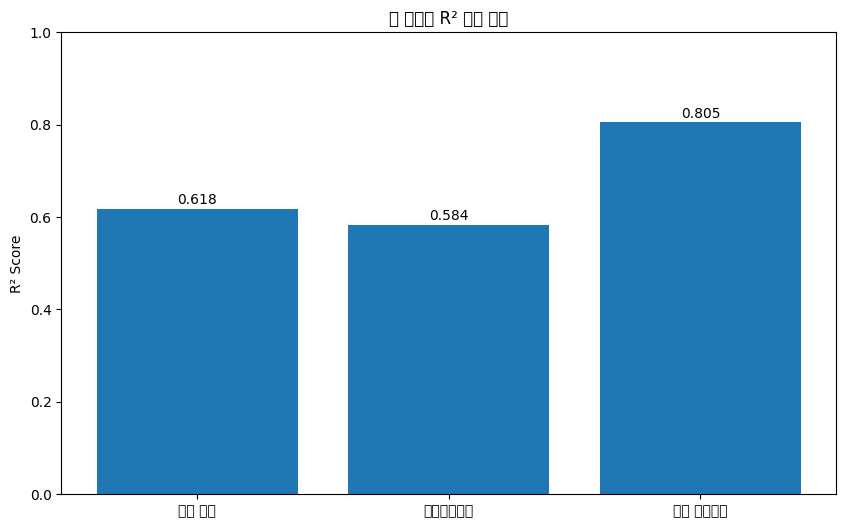

In [126]:
# 결과 분석

import matplotlib.pyplot as plt 
# matplotlib(시각화 도구)의 pyplot(그래프를 그리는 도구)를 불러온다.

# 모델 이름과 성능 저장
models = ['선형 회귀', '의사결정나무', '랜덤 포레스트']
r2_scores = [               # predict() : 테스트 데이터를 예측 하는 함수
    r2_score(y_test, lr_model.predict(X_test)), #lr : LinearRegression 선형 회귀
    r2_score(y_test, dt_model.predict(X_test)), #dt : DecisionTreeRegressor 의사결정나무
    r2_score(y_test, rf_model.predict(X_test))  #rf : RandomForestRegressor 랜덤 포레스트
]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6)) # figure() : 캔버스 크기 설정 ( 10 x 6 )
plt.bar(models, r2_scores) # bar() : 막대 그래프 그리기(모델 이름, R² 점수)
plt.title('각 모델의 R² 점수 비교') # title() : 그래프 제목
plt.ylabel('R² Score') # ylabel() : y축 레이블의 이름은 R² Score
plt.ylim(0, 1)  # ylim() : y축 범위 설정 ( 0 ~ 1 )

# 각 막대 위에 값 표시
for i, v in enumerate(r2_scores): # enumerate() : 인덱스와 값을 동시에 반환(i, v)
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center') # ha='center' : 가운데 정렬
            # 그래프랑 수치가 겹치지 않게 v + 0.01 추가 (가독성)
            # f'{v:.3f}' : 소수점 셋째자리까지 표시(f = float)
plt.show() # show() : 그래프 표시



In [127]:
# 특성 중요도 확인 (랜덤 포레스트의 경우)
feature_importance = pd.DataFrame({  # 'feature'와 'importance'의 데이터프레임 생성
    'feature': selected_features, # selected_features : 선택한 특성들
    'importance': rf_model.feature_importances_ # feature_importances_ : 특성 중요도
    }).sort_values('importance', ascending=False) # sort_values() : 중요도 순으로 정렬
                               # ascending=False : 내림차순 정렬
print("특성 중요도:")
print(feature_importance)

특성 중요도:
   feature  importance
1       RM    0.586109
0    LSTAT    0.299527
4      TAX    0.060520
2  PTRATIO    0.031204
3    INDUS    0.022640


In [128]:
   # 몇 가지 샘플 데이터로 집값 예측해보기
sample_indices = [0, 1, 2]  # 예시로 3개 데이터 선택
predictions = rf_model.predict(X_test[sample_indices]) # predict() : 테스트 데이터를 예측 하는 함수
# 리스트로 선택된 3개 데이터를 예측
actual = y_test.iloc[sample_indices] # iloc[] : 특정 행과 열을 선택하는 메서드
   
print("예측 vs 실제:\n")         # enumerate() : 인덱스와 값을 동시에 반환(i, (pred, act))
                                # zip() : 두 개의 리스트를 합쳐서 튜플로 반환
for i, (pred, act) in enumerate(zip(predictions, actual)):
    print(f"샘플 {i+1}:") # i+1 : 인덱스 번호 출력
    print(f"예측 가격: ${pred:.2f}k") # f'{pred:.2f}k' : 소수점 둘째자리까지 표시
    print(f"실제 가격: ${act:.2f}k") # f'{act:.2f}k' : 소수점 둘째자리까지 표시
    print(f"오차: ${abs(pred-act):.2f}k\n") # f'{abs(pred-act):.2f}k' : 소수점 둘째자리까지 표시


예측 vs 실제:

샘플 1:
예측 가격: $24.36k
실제 가격: $23.60k
오차: $0.76k

샘플 2:
예측 가격: $30.93k
실제 가격: $32.40k
오차: $1.47k

샘플 3:
예측 가격: $17.23k
실제 가격: $13.60k
오차: $3.63k



In [129]:
# end